<a href="https://colab.research.google.com/github/Amphibian27/Natural-Language-Processing/blob/master/Topic_Modeling_Thematic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

In [101]:
import os
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
import spacy
import gensim
import gensim.corpora as corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from nltk import PorterStemmer
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
df = pd.read_csv(r'Usecase3_Dataset.csv', encoding = 'latin1')

In [8]:
print(len(df))
print(df[:5])

14640
  airline_sentiment  ...                                               text
0           neutral  ...                @VirginAmerica What @dhepburn said.
1          positive  ...  @VirginAmerica plus you've added commercials t...
2           neutral  ...  @VirginAmerica I didn't today... Must mean I n...
3          negative  ...  @VirginAmerica it's really aggressive to blast...
4          negative  ...  @VirginAmerica and it's a really big bad thing...

[5 rows x 3 columns]


In [18]:
#Removing handles
df['cleaned_text'] = df["text"].apply(lambda row: re.sub(r'@[^\s]+','',row))

In [19]:
#Remove all links
df['cleaned_text'] = df["cleaned_text"].apply(lambda row: re.sub(r'http[s]?://\S+', '',str(row)))
df['cleaned_text'][7]

' Really missed a prime opportunity for Men Without Hats parody, there. '

In [20]:
#Remove special characters excluding apostrophe
df['cleaned_text'] = df["cleaned_text"].apply(lambda row: re.sub(r"[^A-Za-z0-9']+", ' ',row))
df['cleaned_text'][27]

" do you miss me Don't worry we'll be together very soon "

In [21]:
#remove leading and trailing blanks
df['cleaned_text'] = df["cleaned_text"].apply(lambda row: row.strip(' '))
df['cleaned_text'][27]

"do you miss me Don't worry we'll be together very soon"

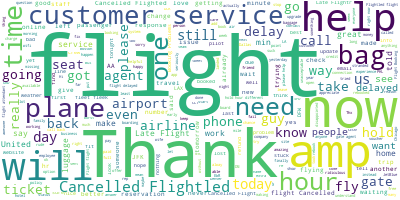

In [95]:

# Join the different processed titles together.
long_string = ','.join(list(df['cleaned_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [110]:
df["cleaned_text"] = df["cleaned_text"].str.lower()

In [121]:
#Removing Stopwords\n
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['flight','thank','plane','amp','will','thanks','thank']
stopwords.extend(newStopWords)

In [122]:
#Tokenize
df['cleaned_tokens'] = df['cleaned_text'].apply(lambda row: row.split(' '))

In [123]:
#Removing stopwords from tokens
df["cleaned_tokens"] = df["cleaned_tokens"].apply(lambda row :[item for item in row if item not in stopwords])
df.head()

,airline_sentiment,airline,text,cleaned_text,cleaned_tokens
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,what said,[said]
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,plus you've added commercials to the experienc...,"[plus, added, commercials, experience, tacky]"
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,i didn't today must mean i need to take anothe...,"[today, must, mean, need, take, another, trip]"
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,it's really aggressive to blast obnoxious ente...,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it,"[really, big, bad, thing]"


In [124]:
#Join for final wordcloud
df['cleaned_tokens']  = df['cleaned_tokens'].apply(' '.join)

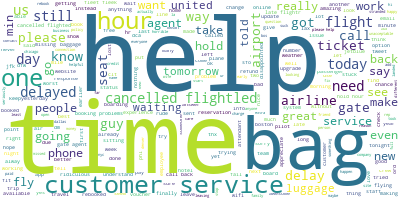

In [125]:

# Join the different processed titles together.
long_string = ','.join(list(df['cleaned_tokens'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Lemmatization

In [126]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [127]:
processed_docs = df['cleaned_text'].map(preprocess)
processed_docs[:10]

0                                                [say]
1          [plus, add, commercials, experience, tacky]
2                            [today, mean, need, trip]
3    [aggressive, blast, obnoxious, entertainment, ...
4                                              [thing]
5          [seriously, flight, seat, play, thing, fly]
6                           [nearly, time, worm, away]
7              [miss, prime, opportunity, hat, parody]
8                                                   []
9                   [amaze, arrive, hour, early, good]
Name: cleaned_text, dtype: object

In [128]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 say
1 add
2 commercials
3 experience
4 plus
5 tacky
6 mean
7 need
8 today
9 trip
10 aggressive


In [129]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [130]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(36, 1), (37, 1), (146, 1), (370, 1), (420, 1), (498, 1)]

In [131]:
bow_doc_2210 = bow_corpus[2210]
for i in range(len(bow_doc_2210)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_2210[i][0], 
                                               dictionary[bow_doc_2210[i][0]], 
bow_doc_2210[i][1]))

Word 12 ("flight") appears 1 time.
Word 24 ("hour") appears 1 time.
Word 91 ("hours") appears 1 time.
Word 169 ("plane") appears 1 time.
Word 202 ("point") appears 1 time.
Word 249 ("nonstop") appears 1 time.
Word 574 ("truly") appears 1 time.
Word 694 ("incompetence") appears 1 time.


In [132]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, workers=2)

In [134]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.062*"flight" + 0.027*"change" + 0.024*"try" + 0.020*"help" + 0.019*"seat" + 0.017*"book" + 0.015*"time" + 0.015*"love" + 0.014*"home" + 0.014*"thank"
Topic: 1 
Words: 0.046*"hold" + 0.028*"help" + 0.028*"know" + 0.024*"hours" + 0.024*"wait" + 0.023*"need" + 0.023*"flight" + 0.018*"hour" + 0.017*"plane" + 0.017*"minutes"
Topic: 2 
Words: 0.043*"thank" + 0.035*"help" + 0.024*"ticket" + 0.022*"flight" + 0.022*"book" + 0.019*"follow" + 0.015*"wait" + 0.012*"look" + 0.011*"problems" + 0.011*"get"
Topic: 3 
Words: 0.027*"flight" + 0.026*"time" + 0.024*"airline" + 0.023*"hours" + 0.019*"thank" + 0.018*"late" + 0.017*"delay" + 0.016*"like" + 0.015*"fly" + 0.014*"flightr"
Topic: 4 
Words: 0.169*"flight" + 0.063*"cancel" + 0.047*"thank" + 0.032*"flightled" + 0.022*"delay" + 0.015*"miss" + 0.014*"today" + 0.013*"late" + 0.013*"tomorrow" + 0.012*"help"
Topic: 5 
Words: 0.059*"flight" + 0.038*"check" + 0.020*"plane" + 0.018*"board" + 0.016*"call" + 0.014*"need" + 0.013*"people" +

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [136]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.41643473505973816	 
Topic: 0.059*"flight" + 0.038*"check" + 0.020*"plane" + 0.018*"board" + 0.016*"call" + 0.014*"need" + 0.013*"people" + 0.012*"baggage" + 0.011*"think" + 0.011*"lose"

Score: 0.3099392056465149	 
Topic: 0.062*"flight" + 0.027*"change" + 0.024*"try" + 0.020*"help" + 0.019*"seat" + 0.017*"book" + 0.015*"time" + 0.015*"love" + 0.014*"home" + 0.014*"thank"

Score: 0.18417948484420776	 
Topic: 0.070*"service" + 0.059*"customer" + 0.030*"phone" + 0.030*"flight" + 0.019*"wait" + 0.015*"number" + 0.015*"try" + 0.015*"hour" + 0.014*"gate" + 0.009*"answer"

Score: 0.017897773534059525	 
Topic: 0.169*"flight" + 0.063*"cancel" + 0.047*"thank" + 0.032*"flightled" + 0.022*"delay" + 0.015*"miss" + 0.014*"today" + 0.013*"late" + 0.013*"tomorrow" + 0.012*"help"

Score: 0.01789408177137375	 
Topic: 0.043*"thank" + 0.035*"help" + 0.024*"ticket" + 0.022*"flight" + 0.022*"book" + 0.019*"follow" + 0.015*"wait" + 0.012*"look" + 0.011*"problems" + 0.011*"get"

Score: 0.01789256930

In [137]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8748434782028198	 
Topic: 0.040*"thank" + 0.029*"flight" + 0.020*"delay" + 0.020*"cancel" + 0.017*"need" + 0.013*"flightled" + 0.011*"time" + 0.010*"today" + 0.009*"plane" + 0.009*"hour"

Score: 0.017902391031384468	 
Topic: 0.017*"flight" + 0.014*"service" + 0.012*"tell" + 0.012*"customer" + 0.011*"airline" + 0.010*"time" + 0.009*"happen" + 0.009*"work" + 0.009*"seat" + 0.009*"check"

Score: 0.01788088120520115	 
Topic: 0.018*"wait" + 0.015*"flight" + 0.012*"thank" + 0.011*"luggage" + 0.010*"follow" + 0.010*"look" + 0.009*"service" + 0.009*"help" + 0.008*"lose" + 0.008*"hold"

Score: 0.017880583181977272	 
Topic: 0.017*"flight" + 0.016*"help" + 0.014*"plane" + 0.011*"seat" + 0.010*"leave" + 0.010*"love" + 0.010*"late" + 0.009*"check" + 0.009*"go" + 0.008*"response"

Score: 0.017878646031022072	 
Topic: 0.036*"flight" + 0.016*"great" + 0.014*"thank" + 0.013*"book" + 0.012*"try" + 0.012*"hours" + 0.011*"cancel" + 0.010*"time" + 0.010*"service" + 0.010*"tomorrow"

Score: 0.0178

In [138]:
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, bow_corpus, dictionary)

In [139]:
lda_model.show_topics()

[(0,
  '0.062*"flight" + 0.027*"change" + 0.024*"try" + 0.020*"help" + 0.019*"seat" + 0.017*"book" + 0.015*"time" + 0.015*"love" + 0.014*"home" + 0.014*"thank"'),
 (1,
  '0.046*"hold" + 0.028*"help" + 0.028*"know" + 0.024*"hours" + 0.024*"wait" + 0.023*"need" + 0.023*"flight" + 0.018*"hour" + 0.017*"plane" + 0.017*"minutes"'),
 (2,
  '0.043*"thank" + 0.035*"help" + 0.024*"ticket" + 0.022*"flight" + 0.022*"book" + 0.019*"follow" + 0.015*"wait" + 0.012*"look" + 0.011*"problems" + 0.011*"get"'),
 (3,
  '0.027*"flight" + 0.026*"time" + 0.024*"airline" + 0.023*"hours" + 0.019*"thank" + 0.018*"late" + 0.017*"delay" + 0.016*"like" + 0.015*"fly" + 0.014*"flightr"'),
 (4,
  '0.169*"flight" + 0.063*"cancel" + 0.047*"thank" + 0.032*"flightled" + 0.022*"delay" + 0.015*"miss" + 0.014*"today" + 0.013*"late" + 0.013*"tomorrow" + 0.012*"help"'),
 (5,
  '0.059*"flight" + 0.038*"check" + 0.020*"plane" + 0.018*"board" + 0.016*"call" + 0.014*"need" + 0.013*"people" + 0.012*"baggage" + 0.011*"think" + 0.01

In [140]:
pyLDAvis.display(vis)

### Key themes
Flight delays –  Topic 5

Flight Reschedules- Topic  7

Complaints/Appreciation for Gate Agents – Topic 4

Flight cancels – Topic 1

Feedback/Suggestions on Customer Services – Topic 6

Sent/Received confirmations(DM & others) - Topic 8

Luggage safeguards - Topic 2

Online services concerns - Topic 3


